# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/rjbeer/CS39AA-Project/blob/main/Project%20Part%201.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/rjbeer/CS39AA-Project/blob/main/Project%20Part%201.ipynb)

## 1.Introduction

The purpose of this project is to explore the effects of different hyperparameters, in terms of accuracy, on their respective models. I will start with random forest and compare it side by side, or progress to, other models. It should be noted this is an deeper analysis of internal hyperperameraters and may or may not delve into hidden layers, dropout rates, etc., and is purely informational. The results from this project are not meant to be used as a final model and are more intended to be used as a potential starting point when building Machine Learning or Deep Learning models.

The chosen dataset for this project is "Starbucks Reviews Dataset" published by Kaggle user Harshal H on kaggle at https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset.

## 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# ...

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


First we will open up the dataset to take a peek at the contents. The code above will give us the filepath to the dataset, and the code below prints out the first few entries of the dataset...

In [2]:
input_data_path = '/kaggle/input/starbucks-reviews-dataset/'
training_data_file = 'reviews_data.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [8]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [4]:
df.shape

(850, 6)

In [5]:
df.columns.tolist()

['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']



The first peek into the dataset shows us quite a bit. First, the data consists of 6 columns as listed above. For the purposes of this model the only columns that will be used are 'Rating' and 'Review'as they are the two columns that give the relevant data. 'Name', 'location', and 'Image_Links' are irrellevent to what we want to look at, and though 'Date' may yeild something useful, perhaps there was a trend towards positive or negative reviews depending on the year, it is also not needed as that is beyond the scope of this particular project. 
Second, there are 850 entries in the dataset, of which there are 705 non-null values in the ratings column. The null data, consisting of 145 total entries, will be removed so that there is less chance that bad data is introduced, potentially decreasing the models predictions.

A bargraph of the 'ratings' collumn will be produced to reveal the the distribution of these data.
The method for producing the bargraph and for cleaning the data later on was produced by Kaggle user Neelabh Somani will be used to show us the data. The original code and method for doing this is located at:

https://www.kaggle.com/code/neelabhsomani/starbucks-sentiment-analysis-81-accuracy

Their method for sorting the data, that being into 0 for negative reviews and 1 for positive reviews, will be used as well. The details of this sorting will be that if the rating is lower than 3 that review will be considered negative, and equal to or greater than 3 will be a positive review.

In [7]:
X_target = df[df['Rating'].isnull()]
X_target.head()

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']


In [9]:
X_target.shape

(145, 6)

In [10]:
df_copy = df.copy(deep=True)
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

In [11]:
df_copy.shape

(705, 6)

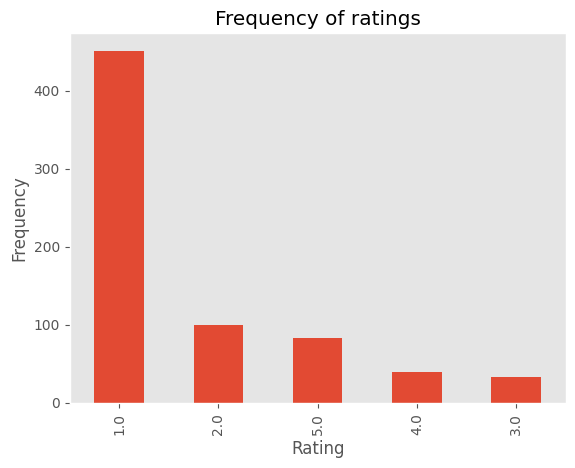

In [13]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
freq = df_copy['Rating'].value_counts()
freq.plot(kind='bar', title='Frequency of ratings', xlabel = 'Rating', ylabel = 'Frequency')
plt.grid()
plt.show()